In [436]:
ls

 adult.csv   adult.names   adult_salary.ipynb  'iris datasheet'/


# Preprocessing

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [438]:
df = pd.read_csv('adult.csv')
df.head()

,age,workplace,fnl_weight,education,e-voc,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [439]:
df.isnull().sum()

age               0
workplace         0
fnl_weight        0
education         0
e-voc             0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workplace       48842 non-null  object
 2   fnl_weight      48842 non-null  int64 
 3   education       48842 non-null  object
 4   e-voc           48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  country         48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [441]:
df["income"].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [442]:
for val in df.keys():
      if type(df[val][0]) == str:
        print(val , df[val].value_counts())

workplace  Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workplace, dtype: int64
education  HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64
marital_status  Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64
occupation  Prof-specialty       61

In [443]:
df =df.replace(to_replace = ' ?', 
                 value =np.nan) 
# df["workplace"].value_counts()
df.head(50)

,age,workplace,fnl_weight,education,e-voc,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [444]:
df.isnull().sum()

age                  0
workplace         2799
fnl_weight           0
education            0
e-voc                0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            857
income               0
dtype: int64

In [445]:
income = {' <=50K':0 , ' >50K':1}
df["Income"] = df["income"].map(income)
df = df.drop(columns = ["income"] , axis=1)
df.head(10)


,age,workplace,fnl_weight,education,e-voc,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,NaN
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,NaN
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,NaN
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,NaN
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,NaN
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,NaN
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,NaN
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,NaN
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,NaN
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,NaN


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workplace       46043 non-null  object 
 2   fnl_weight      48842 non-null  int64  
 3   education       48842 non-null  object 
 4   e-voc           48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  48842 non-null  int64  
 13  country         47985 non-null  object 
 14  Income          32561 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 5.6+ MB


In [447]:
df = df.dropna()
df.isnull().sum()

age               0
workplace         0
fnl_weight        0
education         0
e-voc             0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
Income            0
dtype: int64

In [448]:
df["marital_status"].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [449]:
df = df.drop(columns=["fnl_weight"] , axis=1)
df1 = pd.get_dummies(df , drop_first=True)
df1.keys()

Index(['age', 'e-voc', 'capital-gain', 'capital-loss', 'hours-per-week',
       'Income', 'workplace_ Local-gov', 'workplace_ Private',
       'workplace_ Self-emp-inc', 'workplace_ Self-emp-not-inc',
       'workplace_ State-gov', 'workplace_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishi

In [450]:
df1.head()

,age,e-voc,capital-gain,capital-loss,hours-per-week,Income,workplace_ Local-gov,workplace_ Private,workplace_ Self-emp-inc,workplace_ Self-emp-not-inc,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
16281,39,13,2174,0,40,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16282,50,13,0,0,13,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16283,38,9,0,0,40,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16284,53,7,0,0,40,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16285,28,13,0,0,40,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


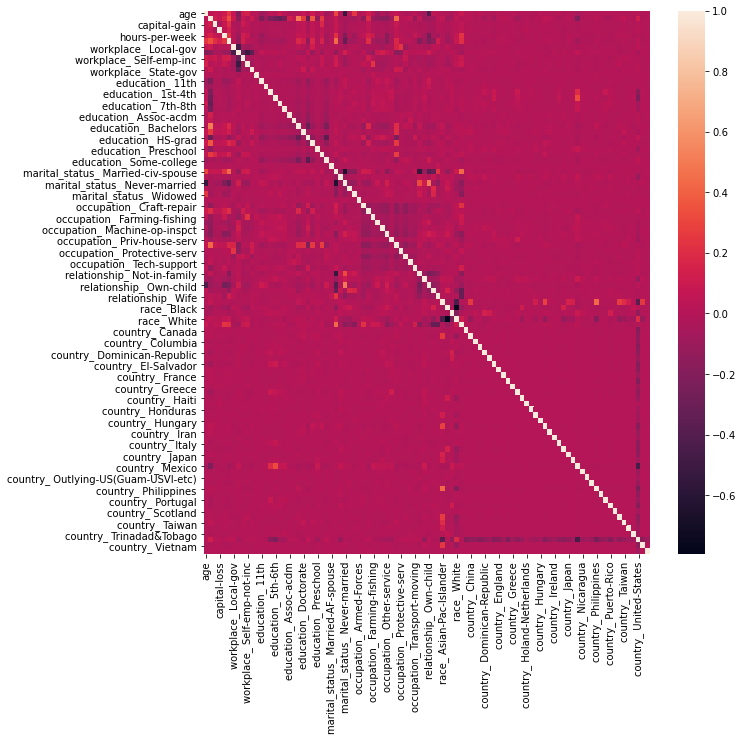

In [451]:
plt.figure(figsize=(10 , 10))
sns.heatmap(df1.corr())


In [452]:
Y = df["Income"];
df = df1.drop(columns=["Income"] , axis = 1)
df.keys()


Index(['age', 'e-voc', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workplace_ Local-gov', 'workplace_ Private', 'workplace_ Self-emp-inc',
       'workplace_ Self-emp-not-inc', 'workplace_ State-gov',
       'workplace_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_

In [453]:
X = df.iloc[: , :].values

# Splitting

In [454]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(X , Y , test_size = 0.2)

In [455]:
x_train.shape

(24129, 95)

In [456]:
y_train.shape

(24129,)

In [457]:
x_test.shape

(6033, 95)

# Model Creation

In [458]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
classifier = gnb.fit(x_train , y_train)
y_pred = classifier.predict(x_test)


Accuracy Score :  0.8251284601359191
Precision_score :  0.6311764705882353
Confudion matrix :  [[3905  627]
 [ 428 1073]]


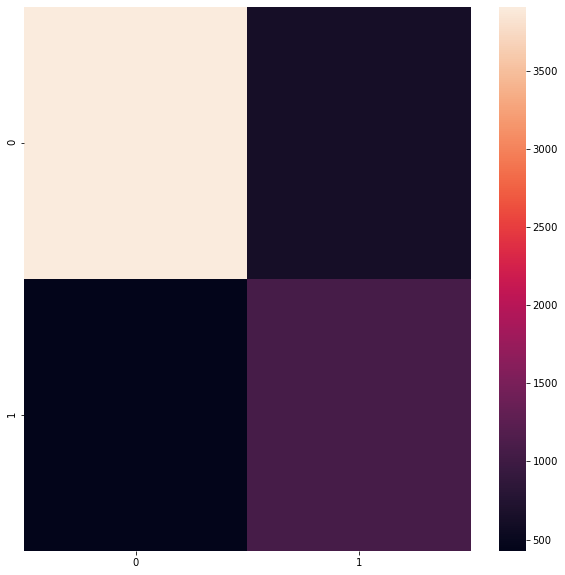

In [459]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix
print("Accuracy Score : " , accuracy_score(y_test , y_pred))
print("Precision_score : " , precision_score(y_test  , y_pred))
print("Confudion matrix : " , confusion_matrix(y_test , y_pred))
plt.figure(figsize=(10 , 10))
sns.heatmap(confusion_matrix(y_test , y_pred))